# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

main_dir='./traffic-signs-data/'
original_file = main_dir + 'train.p'
training_file = main_dir + 'ext_training_file.p'
testing_file = main_dir + 'test.p'

with open(original_file, mode='rb') as f:
    orig_train = pickle.load(f)
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_orig_train, y_orig_train = orig_train['features'], orig_train['labels']
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_orig_train=len(X_orig_train)
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples (in the original set) =", n_orig_train)
print("Number of training examples (in the extended set)=", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples (in the original set) = 39209
Number of training examples (in the extended set)= 96750
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

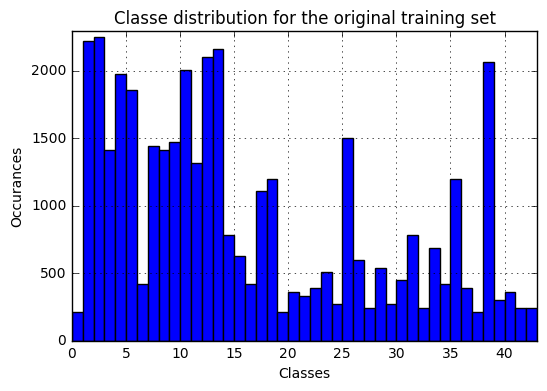

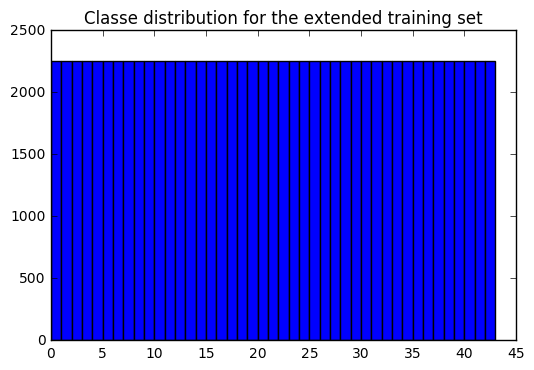

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
from collections import Counter
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Collect information about classe distribution for original training set
y_orig_train_counter = Counter(y_orig_train)
width=1

plt.bar(y_orig_train_counter.keys(), y_orig_train_counter.values(), width, color='b')

plt.xlabel('Classes')
plt.ylabel('Occurances')
plt.title('Classe distribution for the original training set')
plt.axis([0,43,0,2300])
plt.grid(True)

plt.show()

#Display data about extended training set
y_train_counter = Counter(y_train)
plt.bar(y_train_counter.keys(), y_train_counter.values(), width, color='b')

plt.title('Classe distribution for the extended training set')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Processing images...
34


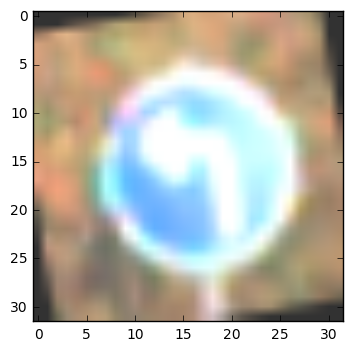

In [4]:
import cv2
import numpy as np
from sklearn.utils import shuffle

#hyper-parameters
kernel_size=3
low_threshold=50
high_threshold=150

# Shuffle data
X_train, y_train = shuffle(X_train, y_train)

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def normalize(img):
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            color=img[x][y]
            for c in color: new_color=float(c-128/128)
            img[x][y]=new_color
    return img

def brightness(img):
    """Adjusts the brightness of the image"""
    alpha=1
    beta=50
    return cv2.addWeighted(img,alpha,np.zeros(img.shape, img.dtype), 0, beta)

print('Processing images...')
count=0

while (count < len(X_train)):
    image=X_train[count]
    X_train[count]=brightness(image)
    #norm_img=normalize(bright_image)
    #X_train[count]=bright_image
    print("Processed {0} images".format(count), end='\r')
    count=count+1

#check the result of preprocessing on a random image
index = random.randint(0, len(X_train))
image=X_train[index].squeeze()

plt.imshow(image)
print(y_train[index])

### Question 1 
Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**
(1) Data shuffling
I first shuffled all the data to make sure the algorithm didn't assume the images were in a certain order.

(2) Apply filters to improve quality
I then created a few filters that could be applied to each image.

Those filter functions are:

- Gaussian Blur
- Brightness (and contrast adjustment)
- Median Blur
- Canny Algorithm
- Conversion to gray image
- Normalization

After applying those filters to the training set (in isolation or combined), I realized that most of them deteriorated the results.
Gaussian Blur and Canny Algorithm that were so helpful for the Line Detection project, made it much worst in this one.

According to Sermanet and LeCun's research paper, turning the images to a gray scale image should have improved the results. Unfortunately, I experienced the opposite. The machine learning results were lower with gray images, so I stuck with the colored images.
Intuitively, I also believe that colors are important to keep for traffic signs classification. Red means forbidden, blue means follow.
So, taking away this key aspect would have remove critical information.

Initially, I also normalized the images by applying the ((c-128)/128) formula to each RGB channel. 
My goal there is to eliminate abnormal values in the image. However, it turned the images to gray, so I decided to turn this preprocessing step off.

Finally, I applied the brightness/correction algorithm. It deteriorated the training results a little bit but I felt that it was important to keep it to make the model more robust.

At the end of the pre-processing step, I displayed a random image.


In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#split the training set into the training and validation sets. We apply the 80-20 rule.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Split the training set into training and validation sets (80%-20%)')

Split the training set into training and validation sets (80%-20%)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_


**Answer:**
Describe how you set up the training, validation and testing data for your model. 
Optional: If you generated additional data, how did you generate the data? 
Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

As data, we were given a training and a test sets. So, I just needed to create a validation set.
I created the validation set by using the "train_test_split" method from sklearn.
I allocated 20% of the training set to the validation set and kept the remaining 80% for the training.


The initial training set includes 39209 images. Sermanet and LeCun's research paper indicated that it was possible to enlarge the training set by "tweaking" each image randomly.

I created a few functions to do so:

- rotation which rotates the image by a random angle included between -15 and +15 degrees.
- translation which moves the image by a few pixels
- perspective transformation which slightly changes the perspective on the image

Initially, the images were not distributed across the 43 classes. So, I decided to generate more images for the underserved classes. This is visible in the second bar graph in Step1.

At the end, each class would have 2250 images (which was the maximum seen for classe 2).
The algorithm randomly picked a transformation between the three above and applied random parameters to those transformations. Because this is a lengthy process, I decided to save the resulting data set. This is called ext_training_file.p

Finally, a key benefit of extending the data set is that it limits overfitting. My training results were down a little bit once I used the extended training set, but it probably helped with unseen data.

The code to generate new data is available in the file: DataGenerator.py


In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 256

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05

    strides=[1,1,1,1]
    pooling=[1,2,2,1]
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x8.
    # To convolute from 32x32 to 28x28, we need to have a 5x5 patch
    Layer1_weights=tf.Variable(tf.truncated_normal(shape=(5,5,3,8), mean=mu, stddev=sigma))
    Layer1_bias=tf.zeros(8)
    conv1 = tf.nn.conv2d(x,Layer1_weights,strides,'VALID')
    conv1 = tf.nn.bias_add(conv1, Layer1_bias)

    # TODO: Activation.
    conv1=tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x8. Output = 14x14x8.
    conv1=tf.nn.max_pool(conv1,pooling, [1,2,2,1], 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    Layer2_weights=tf.Variable(tf.truncated_normal(shape=(5,5,8,16), mean=mu, stddev=sigma))
    Layer2_bias=tf.Variable(tf.zeros(16))
    conv2=tf.nn.conv2d(conv1, Layer2_weights, strides, 'VALID')
    conv2 = tf.nn.bias_add(conv2, Layer2_bias)
                       
    # TODO: Activation.
    conv2=tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=tf.nn.max_pool(conv2,pooling,[1,2,2,1], 'VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 96.
    fc1_weights=tf.Variable(tf.truncated_normal(shape=(400,96), mean=mu, stddev=sigma)) 
    fc1_bias=tf.Variable(tf.zeros(96))
    fc1 = tf.add(tf.matmul(fc1, fc1_weights), fc1_bias)
               
    # TODO: Activation.
    fc1=tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 96. Output = 43.
    out_weights=tf.Variable(tf.truncated_normal(shape=(96,43), mean=mu, stddev=sigma))
    out_bias=tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc1, out_weights), out_bias)

    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is a Deep Neural Network composed of 4 layers. 
The model mostly uses a Convolutional Network.

Layer 1 reads in the input images and apply a 5x5 filter to perform the first convolution. I opted for 8 filters in layer 1.
Layer 1 output is fed into a RELU activation function, followed by a max pooling reduction.

Layer 2 is also a convolutional network. It uses Layer 1 output with 16 filters this time.
It is also followed by a RELU activation function and a max pooling reduction.

Layer 3 is a fully connected layer. It flattens Layer 2 output and performs a linear transformation.

Layer 4 performs another linear transformation using Layer 3 as input. It reduces the output to 43 classes.


In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#Set the key parameters and optimizers for the model/architecture
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Training the model
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.739

EPOCH 2 ...
Validation Accuracy = 0.845

EPOCH 3 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.904

EPOCH 5 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.919

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.931

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.927

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I played with the following parameters to tune my model:

Epochs: I first focused on the epochs and experimented with 15 epochs. 
In a few cases, it provided slightly better results, but, in general, the results didn't move much after 8 batches. I also felt that using 15 batches would encourage over-fitting since the system would see the data more often. So, I decided to stick with 10 EPOCHS.

Batch Size: In the LeNet5 environment, we used a batch size of 128. I decided to go with 256.
I had access to a lot of data and felt that using larger batches would speed up the process.
I also understand that the batch size is mostly to address computing resource constraints. It doesn't impact overfitting for example.

Hyperparameters: - weights were initialized through a random normalized distribution. 
When I set the std deviation (sigma) @ 0.05, I observed my best results overall (98.1%).
Because all the weights have a smaller variance, they are "closer" to each other. This could be a risk for overfitting.
I also ran the model by setting the value of sigma to 0.2. It made the results much worst.

Optimizer: I ran the model with the Adagrad and GradientDescent optimizers. Unforutnately, they both showed much worst results - 8% and 2% respectively.
It looks that sticking with the AdamOptimizer used in LeNet5 architecture was right.
I also explored with different learning rates (smaller or higher) but it provided much worst results too. So, I stuck with 0.001.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I definitely took a "trial and error" approach to come up with the model. I started with the LeNet5 architecture.
That architecture provided very good results (96%) with the given dataset (not extended).

I tried to improve the architecture/model in multiple ways, but rarely observed better results. 

In addition to the changes outlined in Question 4, I also experimented the architecture itself:

- Activation function: instead of using the RELU activation function, I tried the model with the tanh activation function.
This was suggested in the Traffic Sign Classification paper. Unfortunately, switching to tanh showed much worst results (~60%).
I decided to keep using the RELU activation in the model.

- Activation dropout. I also experimented with activation dropouts in the model/architecture. This is supposed to reduce overfitting.
It reduced the processing speed dramatically and the model returned results between 88-92% range. 
This was about 9 points lower than the max pooling approach. So, again, I decided to stick with the Max Pooling approach.

- In the Traffic Sign Classification research paper, the architecture was slightly different that the LeNet5 architecture.
In particular, they mentioned about combining the output of layer 1 (low-level features) with the output of Layer 4 (high-level features) for the last layer.
My results dropped to the 70%, so I decided not to pursue this approach either.

- Features. I also experienced the network with 6, 8,10 or 12 features. The best results were achieved with 6 features, so I stuck with it.

In all honesty, I feel that the best network architecture is the LeNet5 architecture that we viewed in the lecture. 
Despite countless changes, I haven't really been able to come up with a much better architecture/model.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

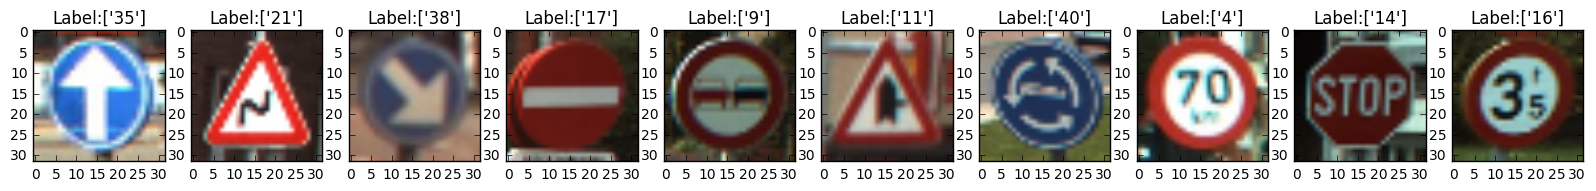

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
import cv2
import re

image_file_list=glob.glob("./randomsigns/*.ppm")

test_set_img=[]
test_set_label=[]

#open traffic images found on the internet and convert them to 32x32x3 format
for image_file in image_file_list:
    img=mpimg.imread(image_file)
    #resize the image to 32x32x3
    img = cv2.resize(img, (32, 32))
    
    #pre-processing step to equalize with engine
    bright_img = brightness(img)
    test_set_img.append(img)
    
    #Extract the label from the filename
    test_set_label.append(re.findall(r'\d+',image_file))

fig=plt.figure(figsize=(20,10))
number_of_files=len(test_set_img)

for i in range(number_of_files):
    a=fig.add_subplot(1,number_of_files,i+1)
    image = test_set_img[i]
    label = test_set_label[i]
    title="Label:"+str(label)
    a.set_title(title)
    plt.imshow(image)

plt.show()
X_sample_test=np.array(test_set_img)
y_sample_test=np.array(test_set_label).squeeze()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I picked 5 images from the internet. Each image brings its own set of challenges.

1. A stop sign which is seen from a different perspective. I created new images in my training set using a perspective transformation. I hope it will detect this stop sign.
2. A 70 speed limit sign.
3. A "forbidden" sign which has been tampered by someone.
4. A wildlife crossing sign but yellow.
5. A regular wildlife sign.

Images were in different sizes, so I transformed them to a 32x32x3 format. This impacts the quality of the images, but I believe this is inline with the way the original training set was created.


In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_sample_test, y_sample_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I decided to apply my model to some Belgian traffic signs. I am interested in globalization issues and also originate from Belgium. In general, Germany and Belgium share many signs but the results proved that it's not always the case.

I picked 10 traffic sign images.

The model predicted the traffic signs with a 60% accuracy. Analysis in provided in Question 8.

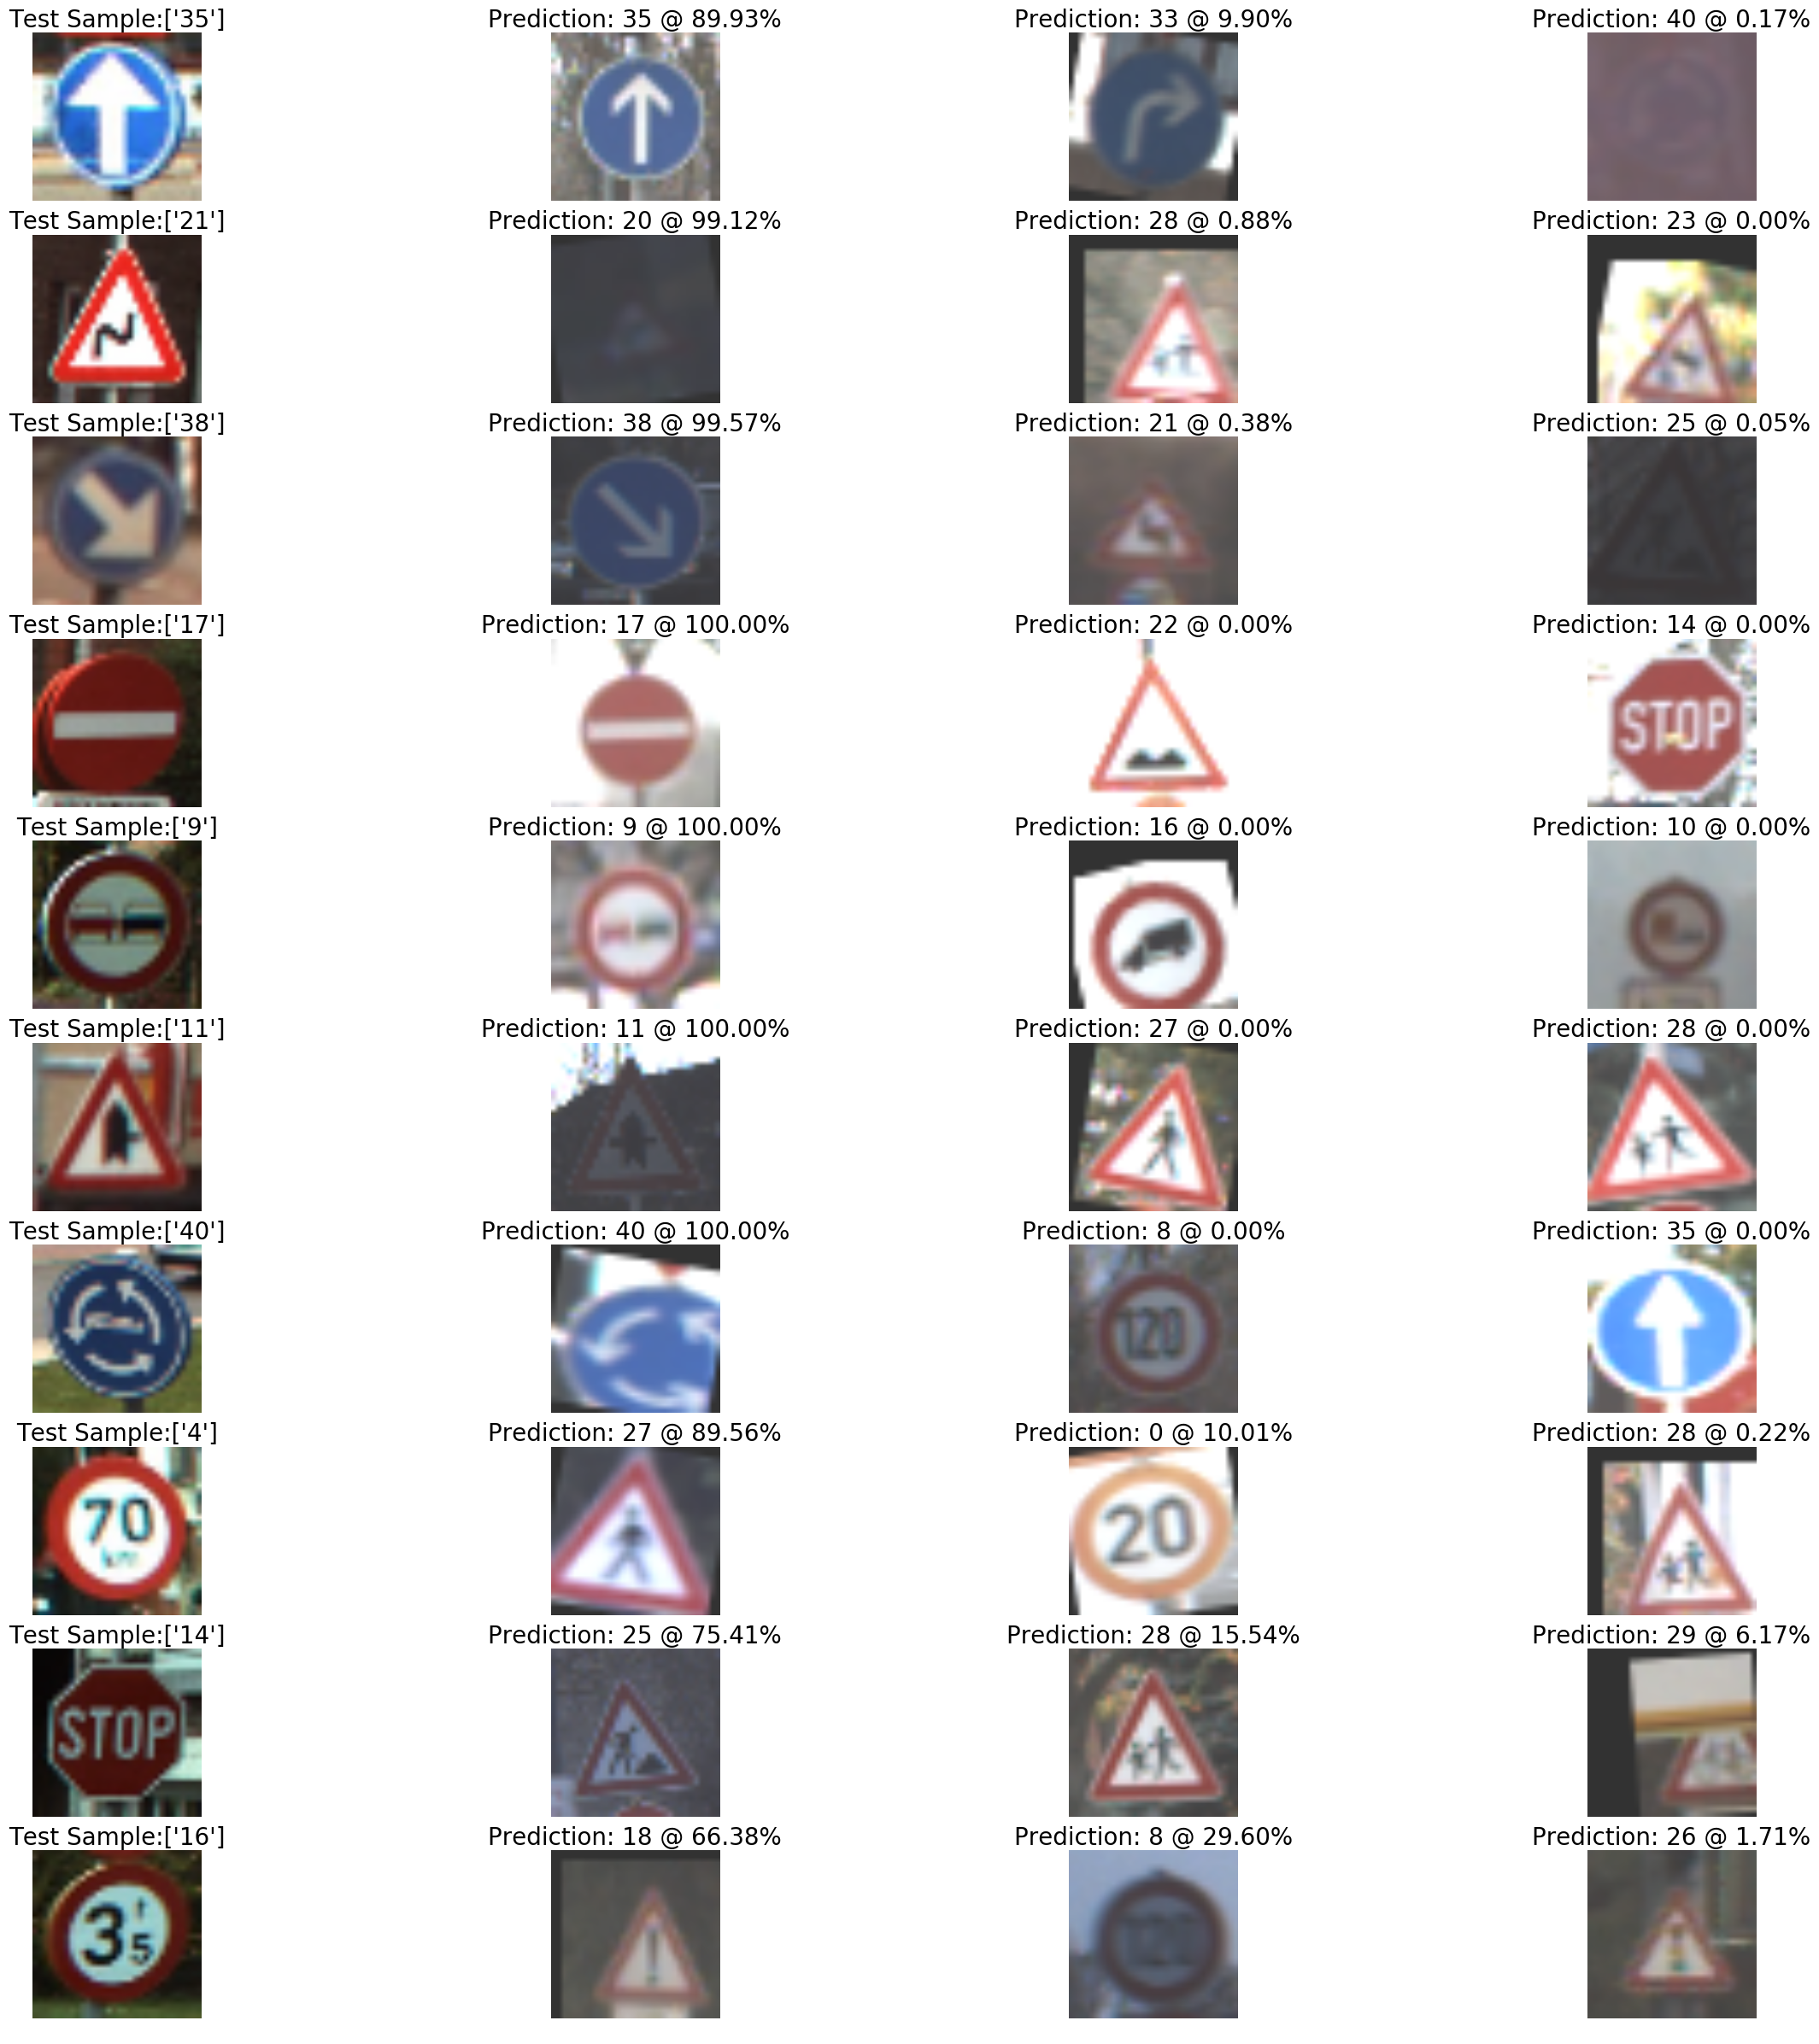

In [78]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax=tf.nn.softmax(logits)
    top3k=tf.nn.top_k(softmax, k=3)
    predictions=sess.run(top3k, feed_dict={x:X_sample_test})
    
fig=plt.figure(figsize=(30,30))

number_of_test_files=len(test_set_img)

#Create figure grid (test_set_imgx4 - we want to show the sample image + 3 highest predictions)
subplot_dim=[number_of_test_files, 4]

i=0
while (i<number_of_test_files):
    
    #display the test image on plot 1
    a=fig.add_subplot(subplot_dim[0],subplot_dim[1],1+i*4)
    image = test_set_img[i]
    label = test_set_label[i]
    title="Test Sample:"+str(label)
    a.set_title(title, fontsize=20)
    a.axis('off')
    plt.imshow(image)

    #for each test image, pick sample images from the training set for the top predictions
    label_list=predictions.indices[i]
    prediction_list=predictions.values[i]
    
    j=0
    for label in label_list:

        #Create an inventory of indices associated to this label
        matches=[k for k,x in enumerate(y_train) if x==label] 
        # Select a random images from matches
        index=random.randint(0, len(matches))
        image_index=matches[index]    
        image = X_train[image_index]

        b=fig.add_subplot(subplot_dim[0], subplot_dim[1], (1+i*4)+j+1)
        label=str(label)
        prediction='{:3.2f}'.format(100*prediction_list[j]) + '%'
        title="Prediction: " + label + " @ " + prediction
        b.set_title(title, fontsize=20)
        b.axis('off')
        plt.imshow(image)
        j=j+1
    i=i+1
    
plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
To address this question, I created a table that displays each test image (in the first column) with their top3
predictions (on the same row). To visualize those predictions, I also included a random image associated to each predicted classe.

A few comments:
(1) 4 of the signs were predicted at 100% probability with the right prediction. 
(2) Two other traffic signs were predicted correctly with a 99.5% and 89% probability.
(3) My second sample image, which represents two dangerous curves combined was not detected properly. 
It actually detected a dangerous right curve @99%. 
For that specific image, the double curve in training set start from right to left. 
In the Belgium image, it was the opposite. So, I can see why the system would see a dangerous right curve as the best guess.
(4) The roundabout image, the model handled well the fact that there was a sticker in the middle of the sign. It ignored it as humans would.
(5) In Belgium, we add units (km/h) to the speed limits. This is not the case on the German signs. It confused the model and the prediction was wrong. The easy way to fix this problem would be to train the engine with more images that also include Km/h under the 70 speed limit.
(6) I can't understand why the Stop sign wasn't labeled properly yet. It was even not included in the top 3 predictions. This requires more investigation.
(7) Finally, the last sign represents a limit of 3.5 tons for vehicles. After the poor prediction with this sign, I realized that German traffic signs are actually very different than in Belgium for this classe.
So, it explains the disconnect and missed classification.

Overall, this was a great and challenging project. It exposed me to Deep Learning architecture, Amazon AWS (which I hadn't used yet), plotting graphics and processing images in python.
It also exposed me to TensorFlow which I only knew by name. Finally, the project allowed me to identify small differences in traffic signs across countries. This is a challenge that the industry will need to address.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.